### Student Information
Name: 蘇昱丞

Student ID: 111033637

GitHub ID: Su033637

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here

# Part 1: Take home

I clone every "take home" HW & those needed cells here. Also hand in the complete code as "DM2022-Lab1-Master"  

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [3]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [4]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [5]:
#Answer here
X.query('index < 10').text

0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquelin Aldridge)...
8    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9    From: libman@hsc.usc.edu (Marlena Libman) Subj...
Name: text, dtype: object

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [6]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [7]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [8]:
# Answer here
NA_df['missing_example'] = pd.to_numeric(NA_df['missing_example'], errors = "coerce")
NA_df['missing_example'].isnull()

0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [9]:
X_keep = X
X_sample = X.sample(n=1000) #random state
print(X_sample.info(), "\n\n", X.info(), "\n\n", X_keep.info(), "\n")
X_diff = pd.concat([X_keep, X]).drop_duplicates(keep=False)
print(X_diff)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1075 to 467
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           1000 non-null   object
 1   category       1000 non-null   int64 
 2   category_name  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 31.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2257 entries, 0 to 2256
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           2257 non-null   object
 1   category       2257 non-null   int64 
 2   category_name  2257 non-null   object
dtypes: int64(1), object(2)
memory usage: 53.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2257 entries, 0 to 2256
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           2257 non-null   object
 1   category      

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:title={'center':'Category distribution'}>

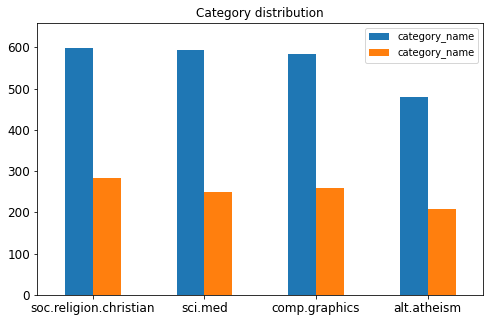

In [11]:
# Answer here
ylimy = max(X.category_name.value_counts().values[:-2]) * 1.1
X_plot = pd.concat([X.category_name.value_counts(), X_sample.category_name.value_counts()], axis = 1, sort=False)
X_plot.plot(kind = 'bar',
            title = 'Category distribution',
            ylim = [0, ylimy], 
            rot = 0, fontsize = 12, figsize = (8,5))

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) 

In [13]:
# Answer here
Xindex = np.where(X_counts[4, 0:100].toarray()[0] == 1)
count_vect.get_feature_names_out()[Xindex]

array(['00', '01'], dtype=object)

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [14]:
import seaborn as sns

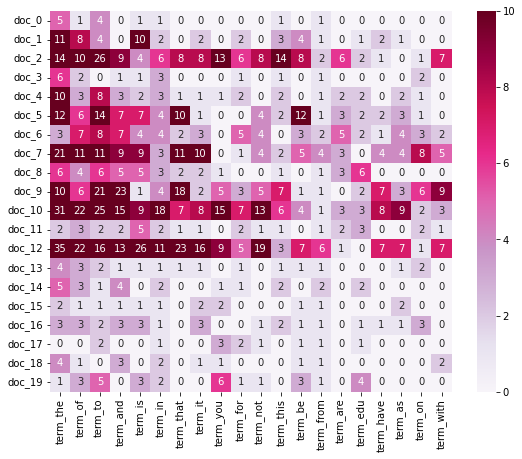

In [15]:
# Answer here
df_Xcounts = pd.DataFrame(X_counts.toarray())
index_sum = df_Xcounts.sum()
df_Xcounts = df_Xcounts[index_sum.sort_values(ascending=False).index[:]]
index_list = list(df_Xcounts.columns)

plot_x1 = ["term_"+str(i) for i in count_vect.get_feature_names_out()[index_list[0:20]]]
plot_y1 = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z1 = df_Xcounts.iloc[0:20, 0:20].to_numpy()


df_todraw1 = pd.DataFrame(plot_z1, columns = plot_x1, index = plot_y1)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw1,
                 cmap="PuRd",
                 vmin=0, vmax=10, annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [16]:
from sklearn.decomposition import PCA

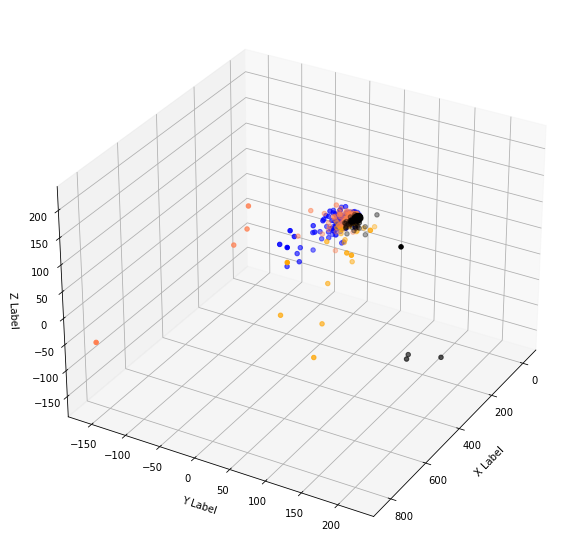

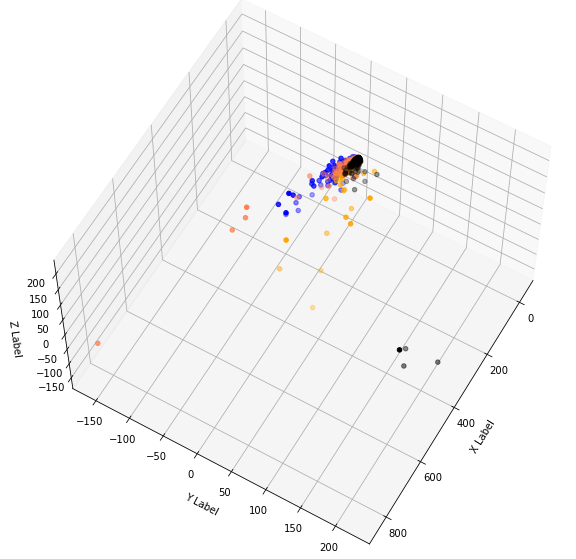

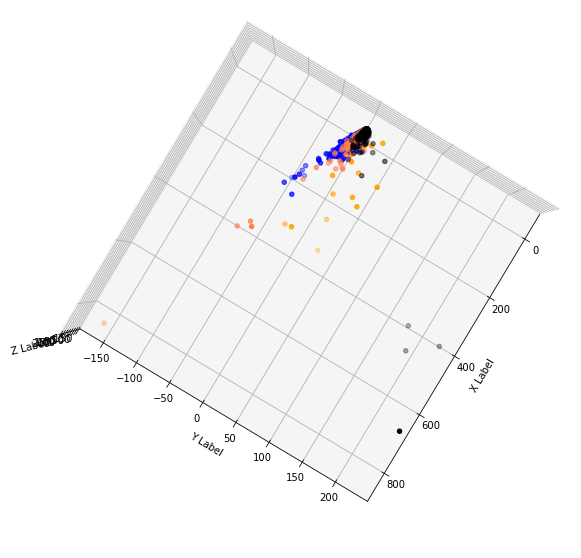

In [17]:
# Answer here
X_reduced_3 = PCA(n_components = 3).fit_transform(X_counts.toarray())
for i in range(1, 4):
    col = ['coral', 'blue', 'black', 'orange']

    # plot
    fig = plt.figure(figsize = (25,10))
    ax = fig.add_subplot(projection = '3d')

    for c, category in zip(col, categories):
        xs = X_reduced_3[X['category_name'] == category].T[0]
        ys = X_reduced_3[X['category_name'] == category].T[1]
        zs = X_reduced_3[X['category_name'] == category].T[2]
    
        ax.scatter(xs, ys, zs, c = c, marker='o')

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')
    ax.view_init(30*i, 30)
    plt.show()

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [18]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [19]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [20]:
# Use the frequency threshold (800) to filter out the feature with lower frequiencies.
temp_x1 = []
temp_y1 = []

for i in range(len(term_frequencies)):
    if term_frequencies[i]>800:
        temp_x1.append(count_vect.get_feature_names_out()[i])
        temp_y1.append(term_frequencies[i])

In [21]:
# Answer here
import plotly.express as px
fig = px.bar(
             x=temp_x1, y=temp_y1,
             labels = {'x':'Feature names', 'y':'Frequencies'},
             title  = "Distribution of Features",
             category_orders = temp_x1
            )
fig.update_traces(texttemplate=temp_y1, textposition='outside')
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [22]:
# Answer here
px_x = count_vect.get_feature_names_out()[index_list[0:20]]
px_y = term_frequencies[index_list[0:20]]

fig = px.bar(x=px_x, y=px_y, category_orders = px_x, 
             labels={'x':'Feature names', 'y':'Frequencies'}, title="Top 20 most frequently appearing features")
fig.show()


### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [23]:
# Answer here
freq_sort = term_frequencies[index_list[0:300]]
fig = px.bar(y=freq_sort.tolist()[0:300],
             labels={'x':'Features', 'y':'Frequencies'}, title="Long tail histogram")
fig.show()


### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [24]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()

In [25]:
# Answer here
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,bin_category,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]","[0, 0, 1, 0]"


# Part 2: New Data-set

## 1. The Data

## 2. Data Preparation

In [26]:
# import
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import pandas as pd
import sklearn

In [27]:
# Load data
dict = {
    'Amazon':'sentiment labelled sentences/amazon_cells_labelled.txt',
    'IMDB':'sentiment labelled sentences/imdb_labelled.txt',
    'YELP':'sentiment labelled sentences/yelp_labelled.txt' 
}
dfs = list()
for name, path in dict.items():
    f = open(path, encoding='utf-8')
    text = f.readlines()
    f.close()
    for line in text:
        line = line.split('\t')
        line[1] = line[1].split('\n')[0]
        line[1] = int(line[1])
        line = tuple(line)+(name,)
        dfs.append(line)

Take at look some of the records that are contained in our subset of the data

In [28]:
for i in range(2):
    print(dfs[i][0])

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.


In [29]:
len(dfs)

3000

Print an example from the subset

In [30]:
print('\n'.join(dfs[0][0].split('\n')))

So there is no way for me to plug it in here in the US unless I go by a converter.


Determine label of example

In [31]:
print(dfs[0][1])

0


### EX1

Print first three data

In [32]:
for i in range(3):
    print(dfs[i][0])

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


## 3. Data Transformation

### 3.1 Converting Dictionary into Pandas Dataframe

In [33]:
df = pd.DataFrame.from_records(dfs, columns=['sentence','score','name'])

In [34]:
len(df)

3000

In [35]:
df[0:2]

,sentence,score,name
0,So there is no way for me to plug it in here i...,0,Amazon
1,"Good case, Excellent value.",1,Amazon


In [36]:
for t in df['sentence'][:3]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


Adding colums

In [37]:
df[0:10]

,sentence,score,name
0,So there is no way for me to plug it in here i...,0,Amazon
1,"Good case, Excellent value.",1,Amazon
2,Great for the jawbone.,1,Amazon
3,Tied to charger for conversations lasting more...,0,Amazon
4,The mic is great.,1,Amazon
5,I have to jiggle the plug to get it to line up...,0,Amazon
6,If you have several dozen or several hundred c...,0,Amazon
7,If you are Razr owner...you must have this!,1,Amazon
8,"Needless to say, I wasted my money.",0,Amazon
9,What a waste of money and time!.,0,Amazon


In [38]:
# add score name to dataframe
sc_name= list()
for i in range(len(df)):
    if df.score[i] == 0:
        sc_name.append("negative")
    else:
        sc_name.append("positive")
df['score_name'] = sc_name

In [39]:
df[0:10]

,sentence,score,name,score_name
0,So there is no way for me to plug it in here i...,0,Amazon,negative
1,"Good case, Excellent value.",1,Amazon,positive
2,Great for the jawbone.,1,Amazon,positive
3,Tied to charger for conversations lasting more...,0,Amazon,negative
4,The mic is great.,1,Amazon,positive
5,I have to jiggle the plug to get it to line up...,0,Amazon,negative
6,If you have several dozen or several hundred c...,0,Amazon,negative
7,If you are Razr owner...you must have this!,1,Amazon,positive
8,"Needless to say, I wasted my money.",0,Amazon,negative
9,What a waste of money and time!.,0,Amazon,negative


### 3.2 Famliarizing yourself with the Data

In [40]:
df[:10][['sentence', 'score_name']]

,sentence,score_name
0,So there is no way for me to plug it in here i...,negative
1,"Good case, Excellent value.",positive
2,Great for the jawbone.,positive
3,Tied to charger for conversations lasting more...,negative
4,The mic is great.,positive
5,I have to jiggle the plug to get it to line up...,negative
6,If you have several dozen or several hundred c...,negative
7,If you are Razr owner...you must have this!,positive
8,"Needless to say, I wasted my money.",negative
9,What a waste of money and time!.,negative


Query the last 10 records

In [41]:
df[-10:]

,sentence,score,name,score_name
2990,The refried beans that came with my meal were ...,0,YELP,negative
2991,Spend your money and time some place else.,0,YELP,negative
2992,A lady at the table next to us found a live gr...,0,YELP,negative
2993,the presentation of the food was awful.,0,YELP,negative
2994,I can't tell you how disappointed I was.,0,YELP,negative
2995,I think food should have flavor and texture an...,0,YELP,negative
2996,Appetite instantly gone.,0,YELP,negative
2997,Overall I was not impressed and would not go b...,0,YELP,negative
2998,"The whole experience was underwhelming, and I ...",0,YELP,negative
2999,"Then, as if I hadn't wasted enough of my life ...",0,YELP,negative


Use loc

In [42]:
df.loc[:10, 'sentence']

0     So there is no way for me to plug it in here i...
1                           Good case, Excellent value.
2                                Great for the jawbone.
3     Tied to charger for conversations lasting more...
4                                     The mic is great.
5     I have to jiggle the plug to get it to line up...
6     If you have several dozen or several hundred c...
7           If you are Razr owner...you must have this!
8                   Needless to say, I wasted my money.
9                      What a waste of money and time!.
10                      And the sound quality is great.
Name: sentence, dtype: object

Use iloc

In [43]:
df.iloc[:10, 0]

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: sentence, dtype: object

### EX2

In [44]:
df.query('index < 10').sentence

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: sentence, dtype: object

### EX3

In [45]:
df[df['score_name'] == 'positive'].iloc[::10][0:5]

,sentence,score,name,score_name
1,"Good case, Excellent value.",1,Amazon,positive
21,I bought this to use with my Kindle Fire and a...,1,Amazon,positive
44,Excellent bluetooth headset.,1,Amazon,positive
61,I really recommend this faceplates since it lo...,1,Amazon,positive
78,"I love this phone , It is very handy and has a...",1,Amazon,positive


## 4.Data Mining using Pandas

### 4.1 Missing values

In [46]:
df.isnull()

,sentence,score,name,score_name
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2995,False,False,False,False
2996,False,False,False,False
2997,False,False,False,False
2998,False,False,False,False


In [47]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,name,score_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


### EX4

In [48]:
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

Insert a Series

In [49]:
d_series = pd.Series(['dummy_record', 1], index=['sentence', 'score'])

In [50]:
d_series

sentence    dummy_record
score                  1
dtype: object

In [51]:
d_series.to_frame().T

,sentence,score
0,dummy_record,1


In [52]:
result_series = pd.concat([df, d_series.to_frame().T], ignore_index=True)

In [53]:
len(result_series)

3001

In [54]:
result_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,name,score_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1,1


Add record to missing value

In [55]:
dummy_dict = [{'sentence': 'dummy_record',
                'score': 1
                }]

In [56]:
df = pd.concat([df, pd.DataFrame(dummy_dict)], ignore_index=True)

In [57]:
len(df)

3001

In [58]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,name,score_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1,1


Remove missing value

In [59]:
df.dropna(inplace=True)

In [60]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,name,score_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [61]:
len(df)

3000

## 4.2 Dealing with Duplicated Data

Check how many duplicated data

In [63]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [64]:
sum(df.duplicated())

17

In [65]:
sum(df.duplicated('sentence'))

17

Drop dummy duplicates

In [67]:
df.drop_duplicates(keep=False, inplace=True)

In [69]:
len(df)

2966

# 5. Data Preprocessing

## 5.1 Sampling

In [70]:
df_keep = df

In [71]:
df_sample = df.sample(n=1000)

In [72]:
len(df_sample)

1000

In [73]:
df_sample[0:4]

,sentence,score,name,score_name
1970,Enough can not be said of the remarkable anima...,1,IMDB,positive
2943,Not good by any stretch of the imagination.,0,YELP,negative
2689,"Good food , good service .",1,YELP,positive
2475,"Third, the cheese on my friend's burger was cold.",0,YELP,negative


### EX6

In [75]:
df_diff = pd.concat([df_keep, df]).drop_duplicates(keep=False)
print(df_diff)

Empty DataFrame
Columns: [sentence, score, name, score_name]
Index: []


Use matplotlib

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

negative    1486
positive    1480
Name: score_name, dtype: int64


<AxesSubplot:title={'center':'Score name distribution'}>

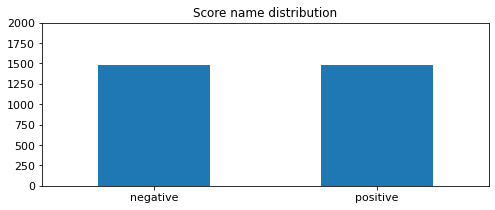

In [80]:
print(df.score_name.value_counts())

df.score_name.value_counts().plot(kind='bar',
                                        title= 'Score name distribution',
                                        ylim= [0, 2000],
                                        rot = 0, fontsize= 11, figsize=(8, 3))

positive    504
negative    496
Name: score_name, dtype: int64


<AxesSubplot:title={'center':'Score name distribution'}>

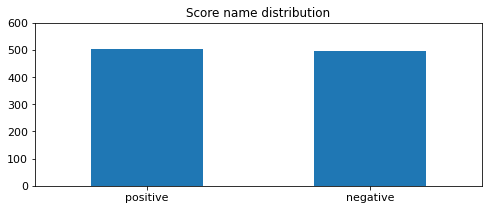

In [84]:
print(df_sample.score_name.value_counts())

df_sample.score_name.value_counts().plot(kind='bar',
                                        title= 'Score name distribution',
                                        ylim= [0, 600],
                                        rot = 0, fontsize= 11, figsize=(8, 3))

### EX7

positive    504
negative    496
Name: score_name, dtype: int64


<AxesSubplot:title={'center':'Score name distribution'}>

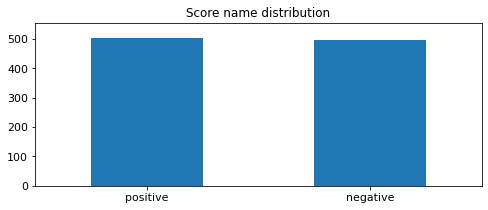

In [93]:
print(df_sample.score_name.value_counts())
y_lim = max(df_sample.score_name.value_counts().values[:1]) * 1.1
df_sample.score_name.value_counts().plot(kind='bar',
                                        title= 'Score name distribution',
                                        ylim= [0, y_lim],
                                        rot = 0, fontsize= 11, figsize=(8, 3))

### EX8

<AxesSubplot:title={'center':'Score name distribution'}>

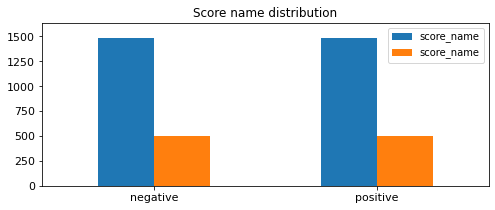

In [94]:
y_lim = max(df.score_name.value_counts().values[:1]) * 1.1
df_plot = pd.concat([df.score_name.value_counts(), df_sample.score_name.value_counts()], axis=1, sort=False)
df_plot.plot(kind='bar',
            title= 'Score name distribution',
            ylim= [0, y_lim],
            rot = 0, fontsize= 11, figsize=(8, 3))

## 5.2 Feature Creation

In [96]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\CI
[nltk_data]     Lab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [97]:
df['unigrams'] = df['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [98]:
df[0:4]['unigrams']

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [99]:
df[0:4]

,sentence,score,name,score_name,unigrams
0,So there is no way for me to plug it in here i...,0,Amazon,negative,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,Amazon,positive,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,Amazon,positive,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,Amazon,negative,"[Tied, to, charger, for, conversations, lastin..."


In [100]:
list(df[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### 5.3 Feature subset selection

In [101]:
from sklearn.feature_extraction.text import CountVectorizer

c_vect = CountVectorizer()
df_counts = c_vect.fit_transform(df.sentence)
print(df_counts)

  (0, 4159)	1
  (0, 4543)	1
  (0, 2426)	1
  (0, 3042)	1
  (0, 4985)	1
  (0, 1828)	1
  (0, 2808)	1
  (0, 4607)	1
  (0, 3385)	1
  (0, 2431)	1
  (0, 2313)	2
  (0, 2157)	1
  (0, 4529)	1
  (0, 4833)	1
  (0, 4791)	1
  (0, 1981)	1
  (0, 646)	1
  (0, 1012)	1
  (1, 1992)	1
  (1, 712)	1
  (1, 1602)	1
  (1, 4859)	1
  (2, 1828)	1
  (2, 4529)	1
  (2, 2022)	1
  :	:
  (2965, 4543)	1
  (2965, 4607)	1
  (2965, 2431)	1
  (2965, 2313)	1
  (2965, 4529)	3
  (2965, 646)	1
  (2965, 2281)	1
  (2965, 4540)	1
  (2965, 3096)	1
  (2965, 4972)	1
  (2965, 2981)	1
  (2965, 4591)	1
  (2965, 297)	1
  (2965, 3165)	1
  (2965, 2629)	1
  (2965, 1539)	1
  (2965, 4546)	1
  (2965, 784)	1
  (2965, 4628)	1
  (2965, 588)	1
  (2965, 2067)	1
  (2965, 3855)	1
  (2965, 3435)	1
  (2965, 5108)	1
  (2965, 1386)	1


In [102]:
analyze = c_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

### EX9

In [103]:
analyze(" ".join(list(df[:1].sentence)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [104]:
df_counts.shape

(2966, 5153)

In [105]:
c_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [113]:
df_counts[0][0]

<1x5153 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [108]:
df_counts[0:10, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### EX10

Vertify every 1 represents word in the FIFTH data

In [118]:
df_index = np.where(df_counts[4, 0:5153].toarray()[0]==1)
c_vect.get_feature_names_out()[df_index]

array(['great', 'is', 'mic', 'the'], dtype=object)

Visualization

In [119]:
plot_dfx = ["term_"+str(i) for i in c_vect.get_feature_names_out()[0:20]]
plot_dfx

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [123]:
plot_dfy = ["doc_"+ str(i) for i in list(df.index)[0:20]]
plot_dfy

['doc_0',
 'doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_17',
 'doc_19',
 'doc_20']

In [124]:
plot_dfz = df_counts[0:20, 0:20].toarray()
plot_dfz

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

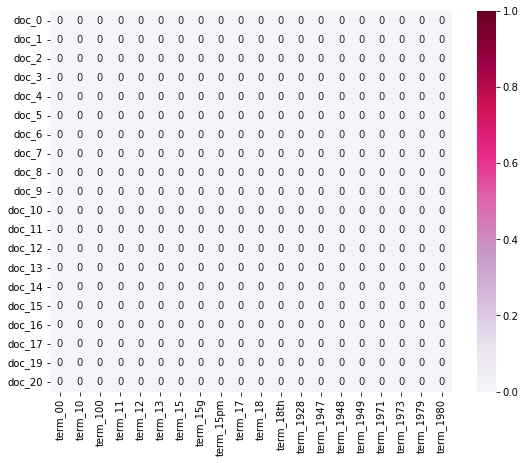

In [125]:
import seaborn as sns

df_draw = pd.DataFrame(plot_dfz, columns=plot_dfx, index=plot_dfy)
plt.subplots(figsize=(9, 7))
ax_df = sns.heatmap(df_draw, cmap="PuRd", vmin=0, vmax=1, annot=True)

### EX11

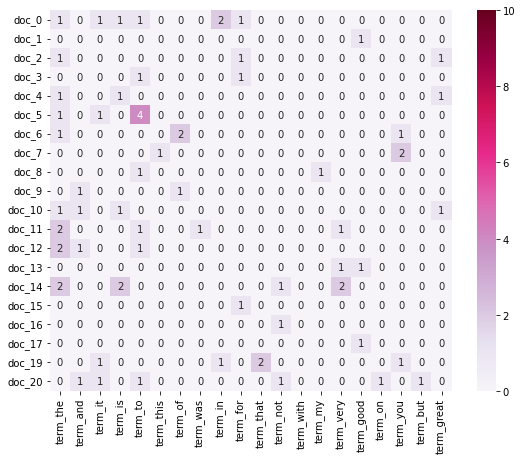

In [132]:
dfdf_Xcounts = pd.DataFrame(df_counts.toarray())
dfindex_sum = dfdf_Xcounts.sum()
dfdf_Xcounts = dfdf_Xcounts[dfindex_sum.sort_values(ascending=False).index[:]]
dfindex_list = list(dfdf_Xcounts.columns)

dfplot_x1 = ["term_"+str(i) for i in c_vect.get_feature_names_out()[dfindex_list[0:20]]]
dfplot_y1 = ["doc_"+ str(i) for i in list(df.index)[0:20]]
dfplot_z1 = dfdf_Xcounts.iloc[0:20, 0:20].to_numpy()


dfdf_todraw1 = pd.DataFrame(dfplot_z1, columns = dfplot_x1, index = dfplot_y1)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(dfdf_todraw1,
                 cmap="PuRd",
                 vmin=0, vmax=10, annot=True)

### 5.4 Dimensionality Reduction

Use PCA

In [133]:
from sklearn.decomposition import PCA

In [134]:
df_reduced = PCA(n_components=2).fit_transform(df_counts.toarray())

In [135]:
df_reduced.shape

(2966, 2)

In [140]:
df_reduced

array([[ 0.51682784,  0.27904124],
       [-0.90241342, -0.36282379],
       [ 0.01407884, -0.66630992],
       ...,
       [-0.50570303,  0.41594856],
       [ 0.49212522,  0.36941553],
       [ 2.32719777, -0.47734141]])

In [143]:
df

,sentence,score,name,score_name,unigrams
0,So there is no way for me to plug it in here i...,0,Amazon,negative,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,Amazon,positive,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,Amazon,positive,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,Amazon,negative,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,Amazon,positive,"[The, mic, is, great, .]"
...,...,...,...,...,...
2995,I think food should have flavor and texture an...,0,YELP,negative,"[I, think, food, should, have, flavor, and, te..."
2996,Appetite instantly gone.,0,YELP,negative,"[Appetite, instantly, gone, .]"
2997,Overall I was not impressed and would not go b...,0,YELP,negative,"[Overall, I, was, not, impressed, and, would, ..."
2998,"The whole experience was underwhelming, and I ...",0,YELP,negative,"[The, whole, experience, was, underwhelming, ,..."


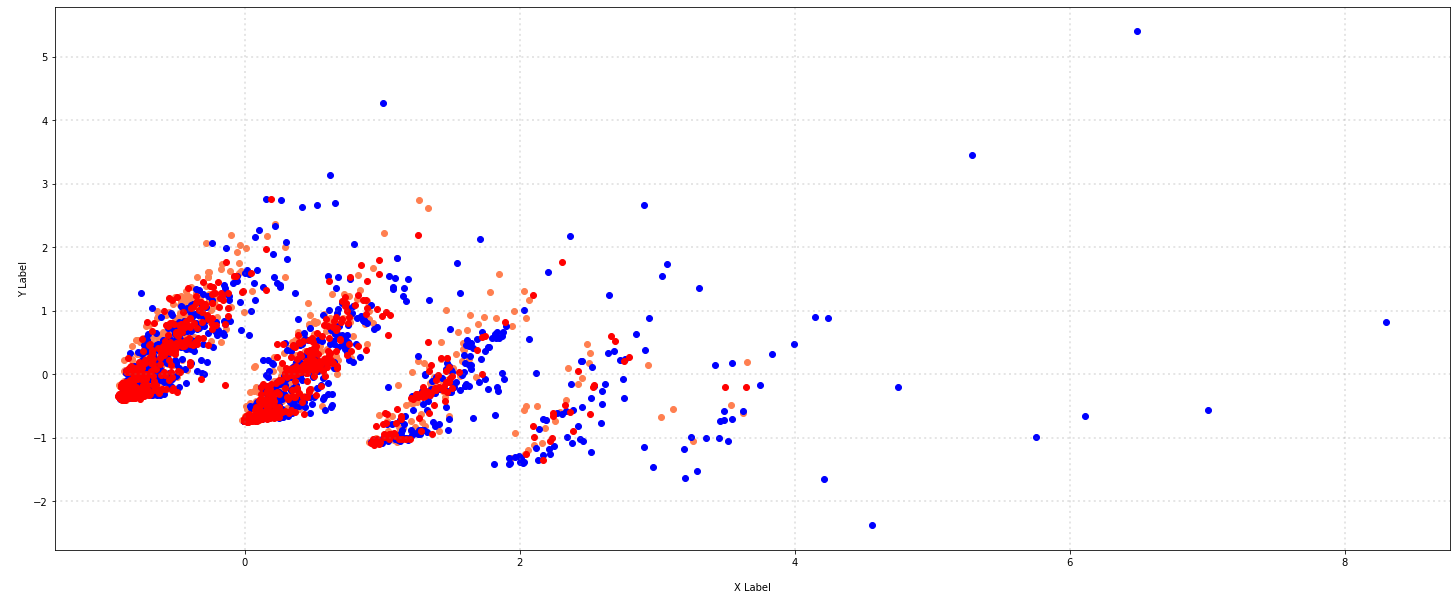

In [150]:
col = ['coral', 'blue', 'red']
category_name = ['Amazon', 'IMDB', 'YELP']
# plot
fig = plt.figure(figsize = (25,10))
ax_df = fig.subplots()

for c, score in zip(col, category_name):
    xs = df_reduced[df['name'] == score].T[0]
    ys = df_reduced[df['name'] == score].T[1]

    ax_df.scatter(xs, ys, c = c, marker='o')

ax_df.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax_df.set_xlabel('\nX Label')
ax_df.set_ylabel('\nY Label')

plt.show()

### EX12

In [147]:
df_reduced_3 = PCA(n_components=3).fit_transform(df_counts.toarray())

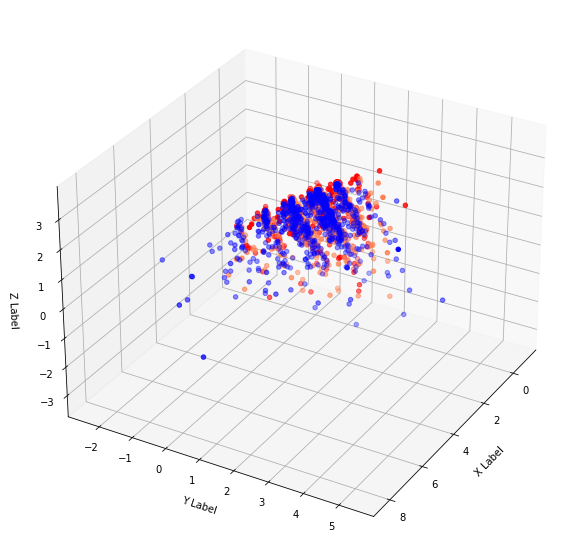

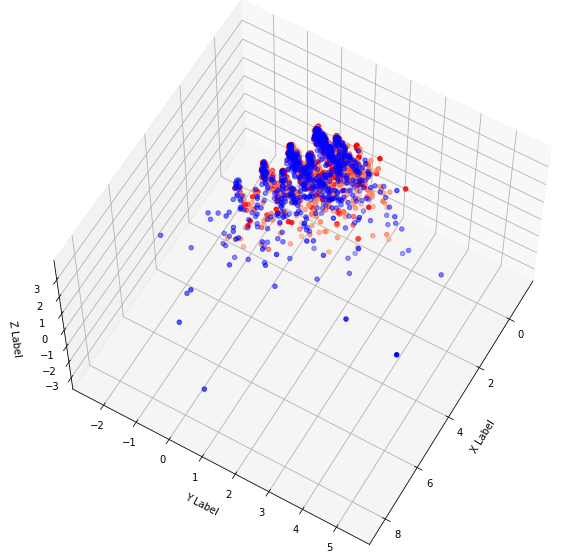

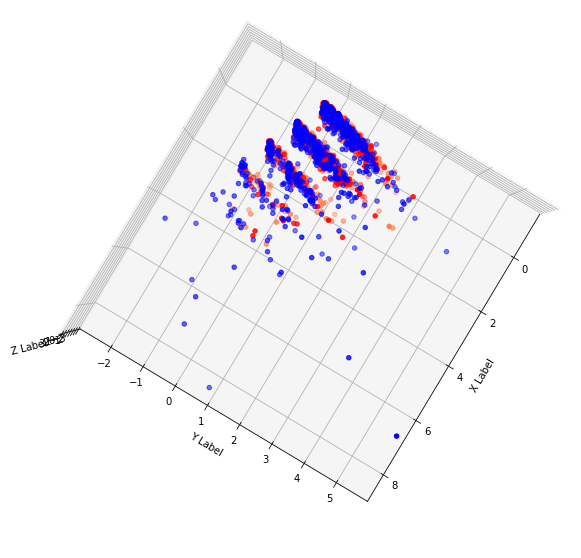

In [154]:
for i in range(1, 4):
    col = ['coral', 'blue', 'red']

    # plot
    fig = plt.figure(figsize = (25,10))
    ax = fig.add_subplot(projection = '3d')

    for c, score in zip(col, category_name):
        xs = df_reduced_3[df['name'] == score].T[0]
        ys = df_reduced_3[df['name'] == score].T[1]
        zs = df_reduced_3[df['name'] == score].T[2]
    
        ax.scatter(xs, ys, zs, c = c, marker='o')

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')
    ax.view_init(30*i, 30)
    plt.show()

### 5.5 Attribute Transformation / Aggregation

In [155]:
dfterm_frequencies = []
for j in range(0, df_counts.shape[1]):
    dfterm_frequencies.append(sum(df_counts[:j].toarray()))

In [156]:
dfterm_frequencies[0:5]

[0,
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64)]

In [158]:
dfterm_frequencies = np.asarray(df_counts.sum(axis=0))[0]

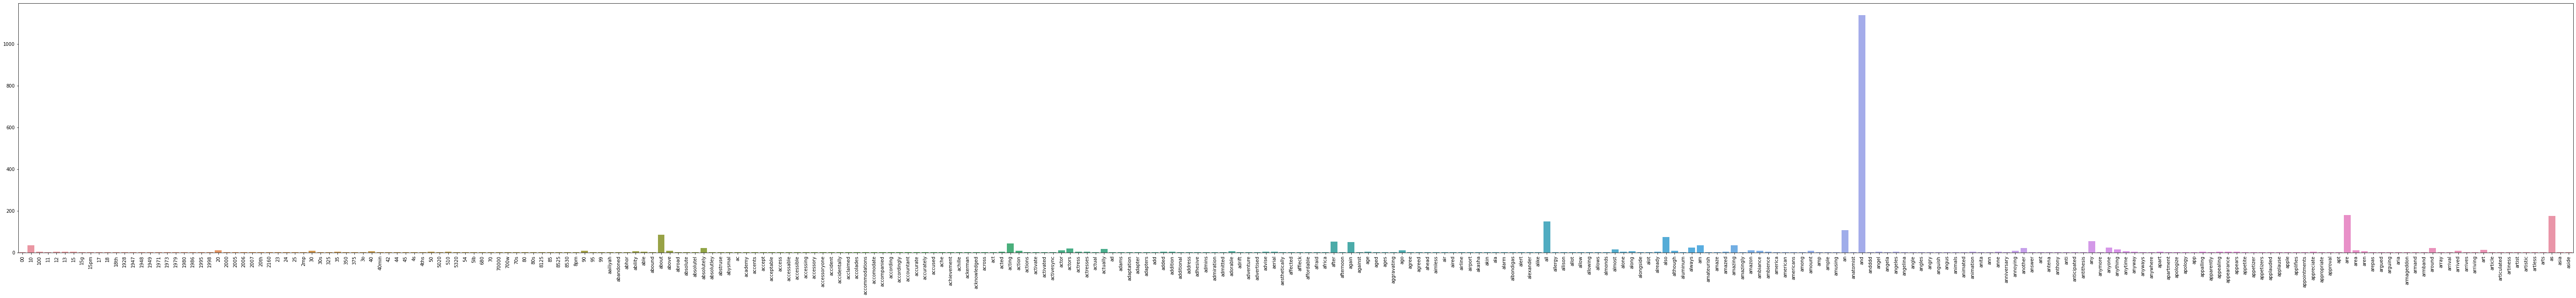

In [161]:
plt.subplots(figsize=(100, 10))
df_g = sns.barplot(x=c_vect.get_feature_names_out()[:300], y = dfterm_frequencies[:300])
df_g.set_xticklabels(c_vect.get_feature_names_out()[:300], rotation = 90);

Fliter out lower frequencies

In [169]:
df_tempx = []
df_tempy = []

for i in range(len(dfterm_frequencies)):
    if dfterm_frequencies[i]>100:
        df_tempx.append(c_vect.get_feature_names_out()[i])
        df_tempy.append(dfterm_frequencies[i])

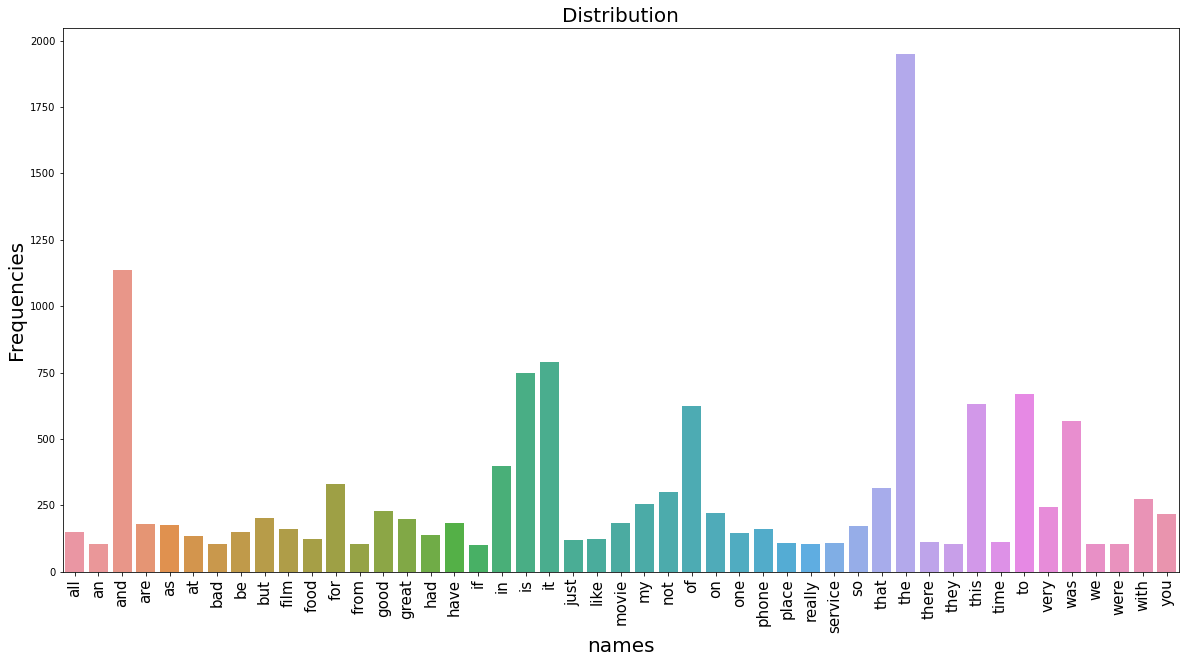

In [170]:
plt.subplots(figsize=(20, 10))

df_g = sns.barplot(x=df_tempx, y=df_tempy)
df_g.set_title('Distribution', fontsize=20)
df_g.set_xlabel('names', fontsize=20)
df_g.set_ylabel('Frequencies', fontsize=20)
df_g.set_xticklabels(df_tempx, rotation=90,  fontsize=15);

### EX13

In [173]:
import plotly.express as px
fig = px.bar(
            x = df_tempx, y = df_tempy, 
            labels = {'x':'Feature names', 'y':'Frequencies'},
            title = "Distribution of features",
            category_orders = df_tempx
)
fig.update_traces(texttemplate=df_tempy, textposition='outside')
fig.show()

### EX14

In [174]:
df_x = c_vect.get_feature_names_out()[dfindex_list[0:20]]
df_y = dfterm_frequencies[dfindex_list[0:20]]

fig = px.bar(x=df_x, y=df_y, category_orders= df_x, labels={'x':'Feature names', 'y':'Frequencies'}, title="Top 20 most frequently appearing features")
fig.show()

### EX15

In [175]:
df_sort = dfterm_frequencies[dfindex_list[0:300]]
fig = px.bar(y=df_sort.tolist()[0:300], labels={'x':'Features', 'y':'Frequencies'},
            title='Long tail histogram')
fig.show()

Transfer into log distribution

In [177]:
import math
dfterm_frequencies_log = [math.log(i) for i in dfterm_frequencies]

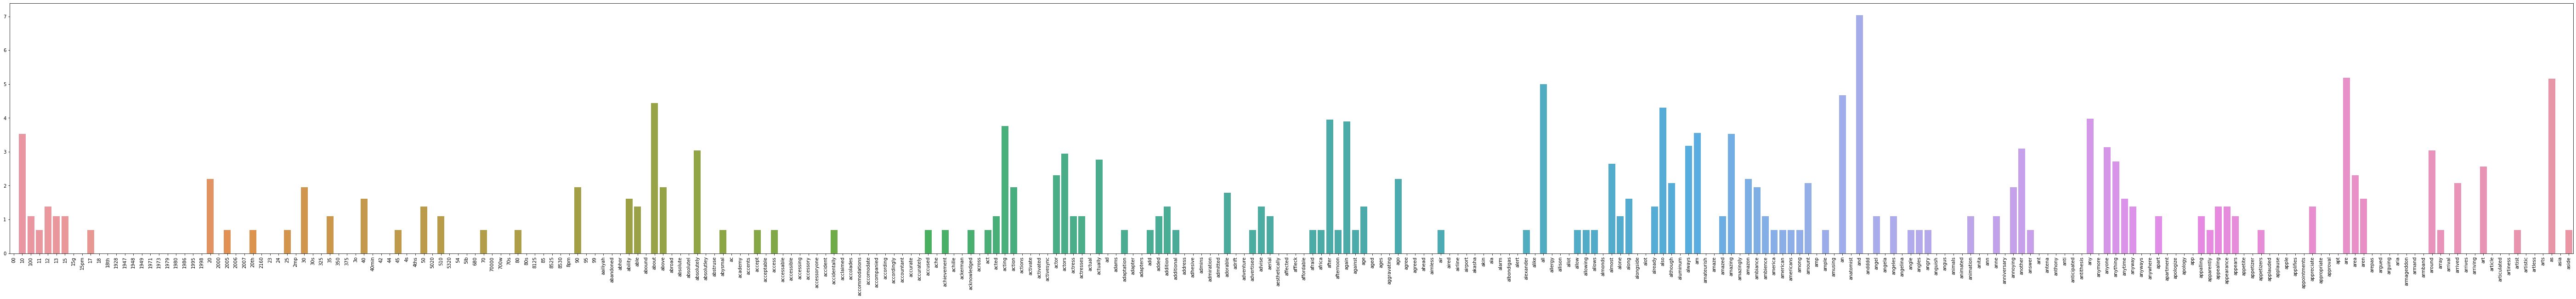

In [178]:
plt.subplots(figsize=(100,10))
g = sns.barplot(x=c_vect.get_feature_names_out()[:300],
                y=dfterm_frequencies_log[:300])
g.set_xticklabels(c_vect.get_feature_names_out()[:300], rotation = 90);

### 5.6 Discretization and Binarization

In [179]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [180]:
mlb = preprocessing.LabelBinarizer()

In [181]:
mlb.fit(df.name)

LabelBinarizer()

In [183]:
df['bin_name'] = mlb.transform(df['name']).tolist()

In [185]:
print(df[0:3],df[1500:1503],df[2500:2503])

                                            sentence  score    name  \
0  So there is no way for me to plug it in here i...      0  Amazon   
1                        Good case, Excellent value.      1  Amazon   
2                             Great for the jawbone.      1  Amazon   

  score_name                                           unigrams   bin_name  
0   negative  [So, there, is, no, way, for, me, to, plug, it...  [1, 0, 0]  
1   positive               [Good, case, ,, Excellent, value, .]  [1, 0, 0]  
2   positive                      [Great, for, the, jawbone, .]  [1, 0, 0]                                                  sentence  score  name  \
1523  20th Century Fox's ROAD HOUSE 1948) is not onl...      0  IMDB   
1524  Full of unconvincing cardboard characters it i...      0  IMDB   
1525  From here on the Widmark character turns unint...      0  IMDB   

     score_name                                           unigrams   bin_name  
1523   negative  [20th, Century, Fox, 

### EX16

In [187]:
mlb.fit(df.name)
df['bin_score_name'] = mlb.fit_transform(df['score_name']).tolist()
df[0:9]

,sentence,score,name,score_name,unigrams,bin_name,bin_score_name
0,So there is no way for me to plug it in here i...,0,Amazon,negative,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]",[0]
1,"Good case, Excellent value.",1,Amazon,positive,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]",[1]
2,Great for the jawbone.,1,Amazon,positive,"[Great, for, the, jawbone, .]","[1, 0, 0]",[1]
3,Tied to charger for conversations lasting more...,0,Amazon,negative,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]",[0]
4,The mic is great.,1,Amazon,positive,"[The, mic, is, great, .]","[1, 0, 0]",[1]
5,I have to jiggle the plug to get it to line up...,0,Amazon,negative,"[I, have, to, jiggle, the, plug, to, get, it, ...","[1, 0, 0]",[0]
6,If you have several dozen or several hundred c...,0,Amazon,negative,"[If, you, have, several, dozen, or, several, h...","[1, 0, 0]",[0]
7,If you are Razr owner...you must have this!,1,Amazon,positive,"[If, you, are, Razr, owner, ..., you, must, ha...","[1, 0, 0]",[1]
8,"Needless to say, I wasted my money.",0,Amazon,negative,"[Needless, to, say, ,, I, wasted, my, money, .]","[1, 0, 0]",[0]


# 6.Data Exploration

3 sentences for random record

In [204]:
df_trans1 = []
rand_record1 = df.iloc[65]
rand_record1 = rand_record1['sentence']
df_trans1.append(rand_record1)

df_trans2 = []
rand_record2 = df.iloc[140]
rand_record2 = rand_record2['sentence']
df_trans2.append(rand_record2)

df_trans3 = []
rand_record3 = df.iloc[156]
rand_record3 = rand_record3['sentence']
df_trans3.append(rand_record3)

In [206]:
print(df_trans1)
print(df_trans2)
print(df_trans3)

['A week later after I activated it, it suddenly died.']
['During several different 2 minute calls, I experienced 5 drops and it was in an area that had 5 bars.']
['This item is fantastic and works perfectly!']


In [207]:
from sklearn.preprocessing import binarize

df_vec_count1 = c_vect.transform(df_trans1)
df_vec_count2 = c_vect.transform(df_trans2)
df_vec_count3 = c_vect.transform(df_trans3)

df_vec_count1_bin = binarize(df_vec_count1)
df_vec_count2_bin = binarize(df_vec_count3)
df_vec_count3_bin = binarize(df_vec_count3)

print(df_vec_count1.todense())
print(df_vec_count2.todense())
print(df_vec_count3.todense())

[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [208]:
from sklearn.metrics.pairwise import cosine_similarity

cos_1_2 = cosine_similarity(df_vec_count1, df_vec_count2, dense_output=True)
cos_1_3 = cosine_similarity(df_vec_count1, df_vec_count3, dense_output=True)
cos_2_3 = cosine_similarity(df_vec_count2, df_vec_count3, dense_output=True)

cos_1_1 = cosine_similarity(df_vec_count1, df_vec_count1, dense_output=True)
cos_2_2 = cosine_similarity(df_vec_count2, df_vec_count2, dense_output=True)
cos_3_3 = cosine_similarity(df_vec_count3, df_vec_count3, dense_output=True)

print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_3_3})

Cosine Similarity using count bw 1 and 2: 0.158114
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.094491
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000
